# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [72]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [73]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key


In [74]:

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | utrik
Processing Record 4 of Set 1 | lillebonne
Processing Record 5 of Set 1 | ust-nera
Processing Record 6 of Set 1 | nyurba
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | sumbe
Processing Record 9 of Set 1 | columbus
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | petropavlovsk-kamchatsky
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | vorgashor
Processing Record 17 of Set 1 | badger
Processing Record 18 of Set 1 | qamdo
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | qusmuryn
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | papatowai
Processing Re

In [75]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [76]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,15.29,100,40,0.00,CA,1690788647
1,adamstown,-25.0660,-130.1015,18.92,61,63,10.25,PN,1690788725
2,utrik,11.2278,169.8474,28.37,80,80,8.54,MH,1690788726
3,lillebonne,49.5203,0.5362,18.60,85,100,6.99,FR,1690788672
4,ust-nera,64.5667,143.2000,7.97,95,100,3.26,RU,1690788588


In [77]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [78]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,15.29,100,40,0.00,CA,1690788647
1,adamstown,-25.0660,-130.1015,18.92,61,63,10.25,PN,1690788725
2,utrik,11.2278,169.8474,28.37,80,80,8.54,MH,1690788726
3,lillebonne,49.5203,0.5362,18.60,85,100,6.99,FR,1690788672
4,ust-nera,64.5667,143.2000,7.97,95,100,3.26,RU,1690788588


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

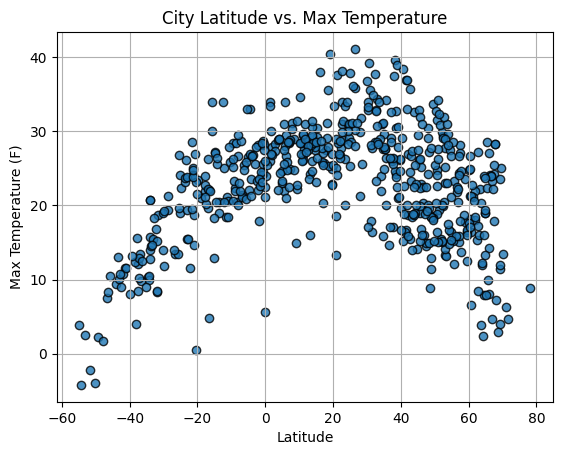

In [79]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors= "black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.title(f"City Latitude vs. Max Temperature")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

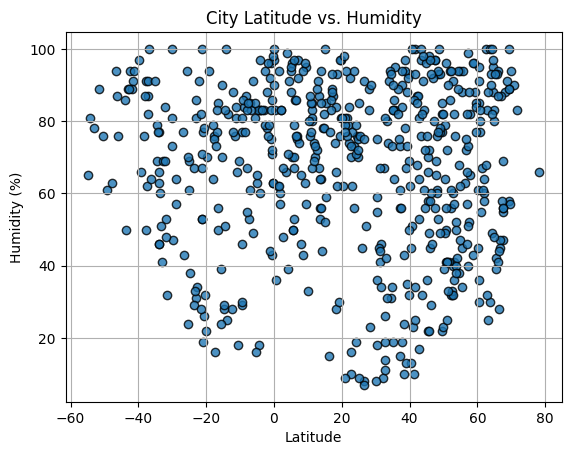

In [80]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors= "black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.title(f"City Latitude vs. Humidity")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

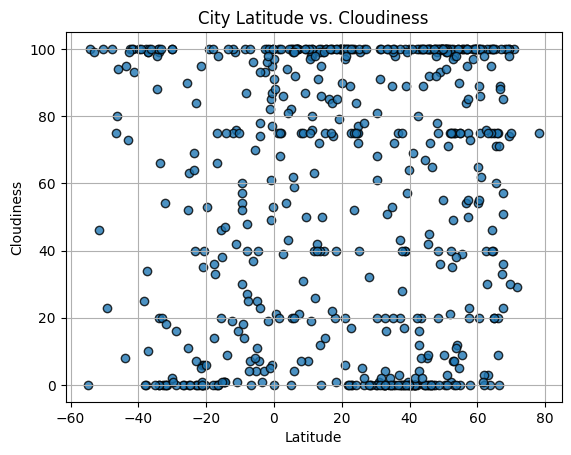

In [81]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors= "black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.title(f"City Latitude vs. Cloudiness")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

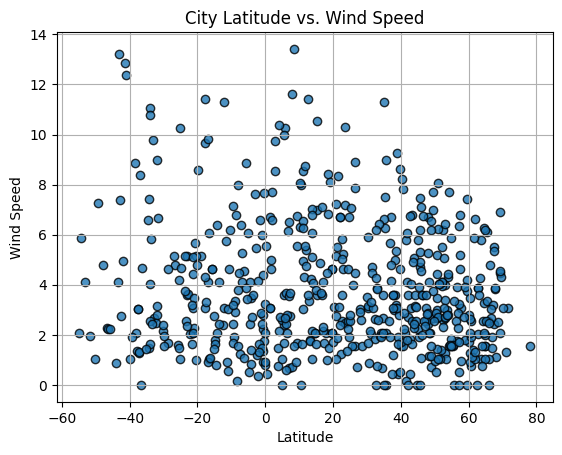

In [82]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors= "black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.title(f"City Latitude vs. Wind Speed")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [83]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [84]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,15.29,100,40,0.00,CA,1690788647
2,utrik,11.2278,169.8474,28.37,80,80,8.54,MH,1690788726
3,lillebonne,49.5203,0.5362,18.60,85,100,6.99,FR,1690788672
4,ust-nera,64.5667,143.2000,7.97,95,100,3.26,RU,1690788588
5,nyurba,63.2842,118.3319,22.21,25,3,4.29,RU,1690788726


In [85]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,18.92,61,63,10.25,PN,1690788725
7,sumbe,-11.2061,13.8437,21.15,81,76,0.90,AO,1690788727
9,puerto ayora,-0.7393,-90.3518,24.19,96,85,1.34,EC,1690788727
10,hithadhoo,-0.6000,73.0833,28.10,71,95,0.90,MV,1690788727
18,port-aux-francais,-49.3500,70.2167,2.28,61,23,7.25,TF,1690788729


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.4834943014396039


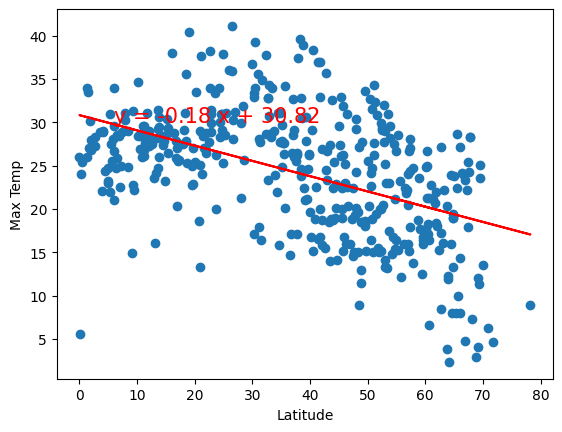

In [86]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-value is: 0.7982229732442591


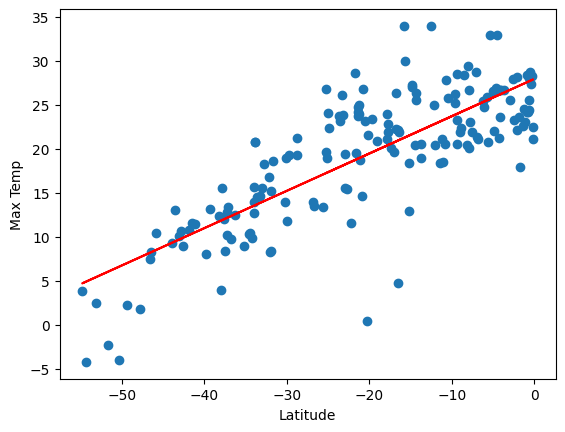

In [87]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

As expected there is a positive correlation with Latitude and higher temperatures as one moves closer to the equator (Latitude 0)

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.06737267337714264


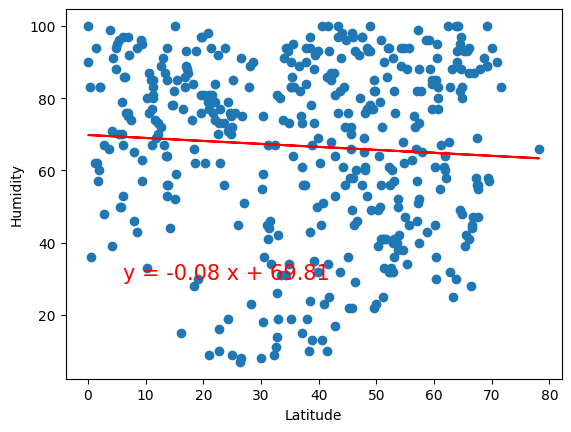

In [88]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (6,30))

The r-value is: -0.04684100499171924


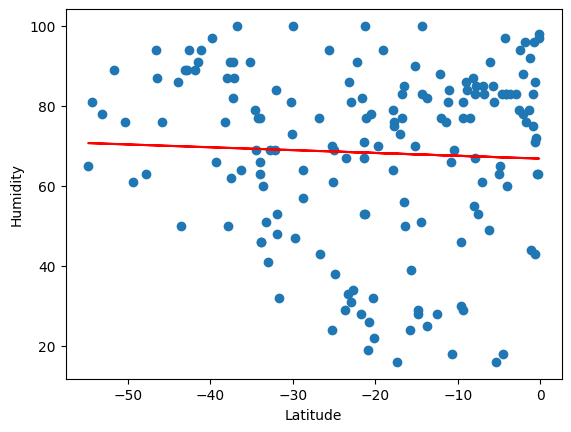

In [89]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (6,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is little correlation wiht the humidity levels and relationship to the equator, or Latitude in General.  It is steadily humid everywhere! 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.03705113999985964


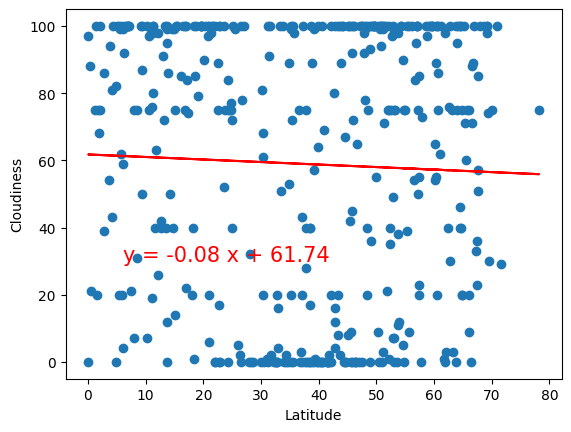

In [90]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (6,30))

The r-value is: -0.07451584818964811


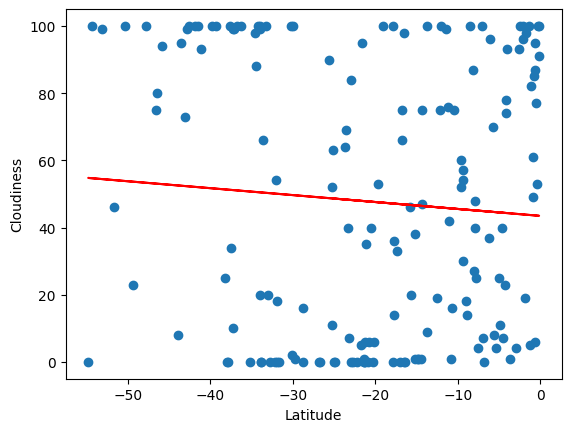

In [91]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (6,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

there is a negative correlation with cloudiness and latitude. The negative linear line continues to indicate it is more at the equator and less in the higher latitudes so it is more cloudy at the equator than other areas of the earth. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.21752393654603994


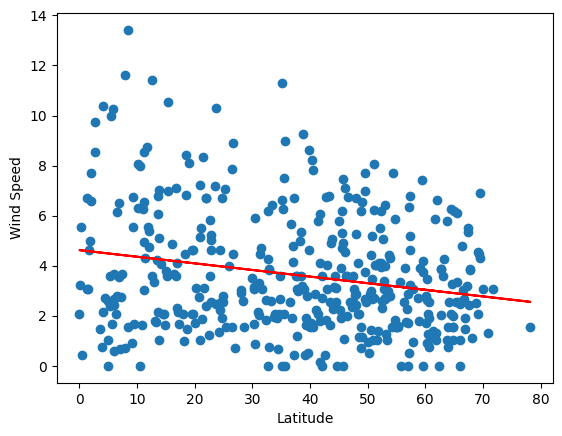

In [92]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (6,30))

The r-value is: -0.14042784965312846


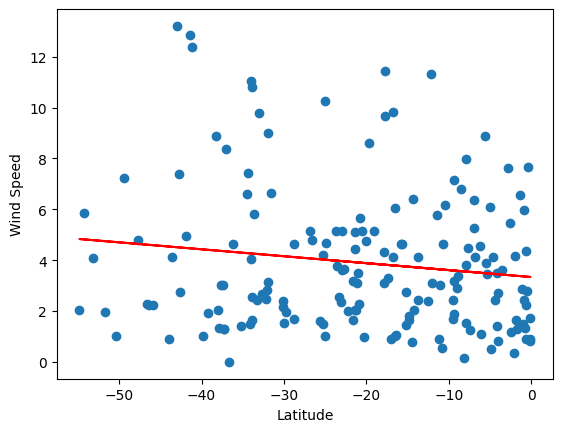

In [93]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (6,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Wind speeds are stronger as we move south, even past the equator. 